In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
from yt.frontends.boxlib.data_structures import AMReXDataset

In [2]:
ts = yt.load('plt?????')
times = []
us = []
for ds in ts[:]:
    ad = ds.all_data()
    times.append(ds.current_time)
    us.append(ad.quantities.extrema('u'))
ts = np.array(ts)
us = np.array(us)

yt : [INFO     ] 2022-06-05 07:38:36,505 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-06-05 07:38:36,508 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2022-06-05 07:38:36,509 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-05 07:38:36,510 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-06-05 07:38:36,846 Parameters: current_time              = 10.0
yt : [INFO     ] 2022-06-05 07:38:36,847 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2022-06-05 07:38:36,848 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-05 07:38:36,850 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-06-05 07:38:37,165 Parameters: current_time              = 20.0
yt : [INFO     ] 2022-06-05 07:38:37,166 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2022-06-05 07:38:37,167 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [I


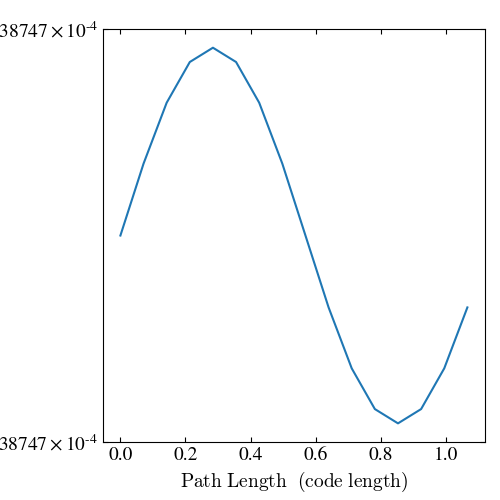

In [3]:
yt.LinePlot(ds, 'u', (0,0,0), (1,0,0), 16)

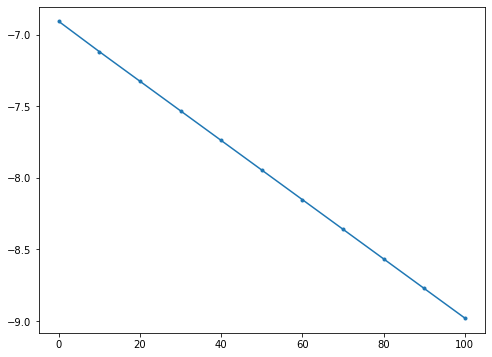

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(times,np.log(us[:,1]), '.-');

In [5]:
np.polyfit(times,np.log(us[:,1]),1)

array([-0.02067913, -6.91087888])

In [6]:
# data input manually from a few runs with different taus
nx = 16
k = 2*np.pi/nx
tau = [ 1.0, 0.9, 0.8, 0.7, 0.6 ]
ls = [ -0.02570095, -0.02067913, -0.0155872, -0.01044244, -5.26044347e-03 ] 
nu = 1./3.*(np.array(tau)-0.5)
lp = -nu*k**2

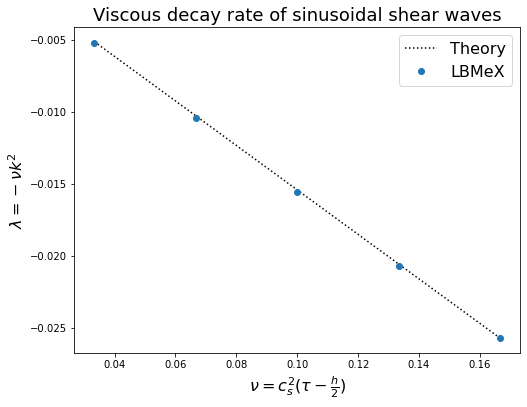

In [7]:
plt.subplots(figsize=(8,6))
plt.plot(nu, lp, 'k:', label="Theory")
plt.plot(nu, ls, 'o', label='LBMeX')
plt.xlabel(r'$\nu=c_s^2(\tau-\frac{h}{2})$', size=16)
plt.ylabel(r'$\lambda=-\nu k^2$', size=16)
plt.title("Viscous decay rate of sinusoidal shear waves", size=18)
plt.legend(fontsize=16);